# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys
    
    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn

### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [2]:
#Provide your code for part 1-1 here

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
#Provide your code for part 1-2 here

X, y = mnist.data, mnist.target

# Print dataset dimensions and size
print(f"Dataset dimensions: {X.shape}")
print(f"Dataset size: {X.size}")

# Print the number of classes
print(f"Number of classes: {len(set(y))}")

Dataset dimensions: (70000, 784)
Dataset size: 54880000
Number of classes: 10


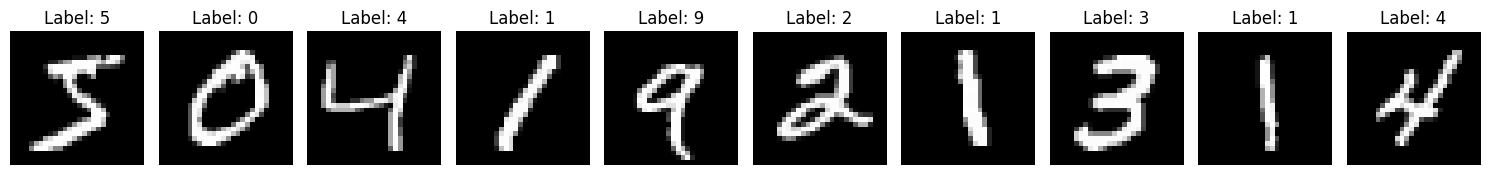

In [4]:
#Provide your code for part 1-3 here

fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y[i]}")
plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [5]:
# Provide your code for part 2 here

# Scale the pixel values to range [0,1]
X = X / 255.0

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object and fit it on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

# Print the shapes of the resulting training and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (56000, 784)
Test set shape: (14000, 784)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [11]:
# Provide your code for part 3-1 here

# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the model on the test data
logistic_accuracy = logistic_model.score(X_test, y_test)
print(f"Logistic Regression Test Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Test Accuracy: 0.9154


In [12]:
# Provide your code for part 3-2 here

# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), solver='adam', learning_rate_init=0.001, max_iter=200, random_state=42)
nn_model.fit(X_train, y_train)

# Evaluate the model on the test data
nn_accuracy = nn_model.score(X_test, y_test)
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")

Neural Network Test Accuracy: 0.9712


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


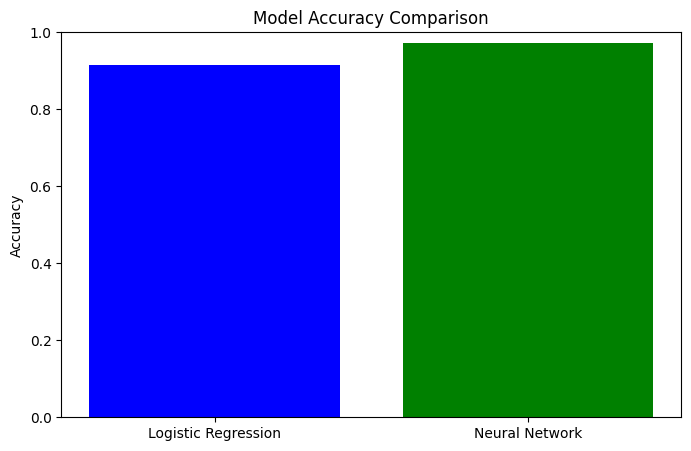

In [13]:
# Provide your code for part 4-1 here

# Accuracy values for both models
model_names = ['Logistic Regression', 'Neural Network']
accuracies = [logistic_accuracy, nn_accuracy]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Logistic Regression Confusion Matrix:


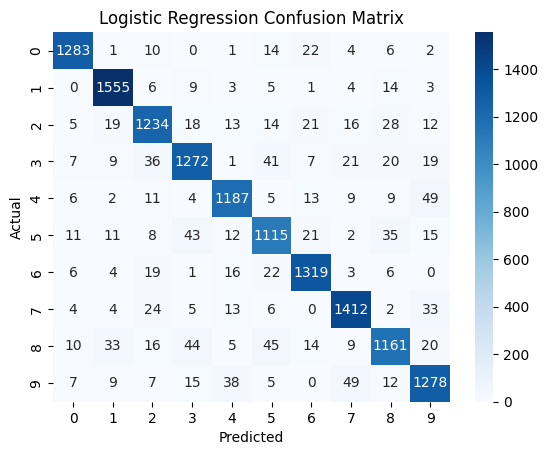

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.97      0.96      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.97      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Neural Network Confusion Matrix:


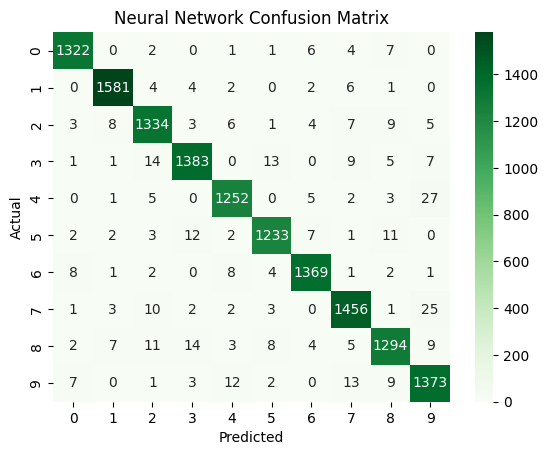

In [14]:
# Provide your code for part 4-2 here

# Logistic Regression classification report and confusion matrix
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_model.predict(X_test)))

print("Logistic Regression Confusion Matrix:")
logistic_cm = confusion_matrix(y_test, logistic_model.predict(X_test))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Neural Network classification report and confusion matrix
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_model.predict(X_test)))

print("Neural Network Confusion Matrix:")
nn_cm = confusion_matrix(y_test, nn_model.predict(X_test))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Number of misclassified examples (Logistic Regression): 1184


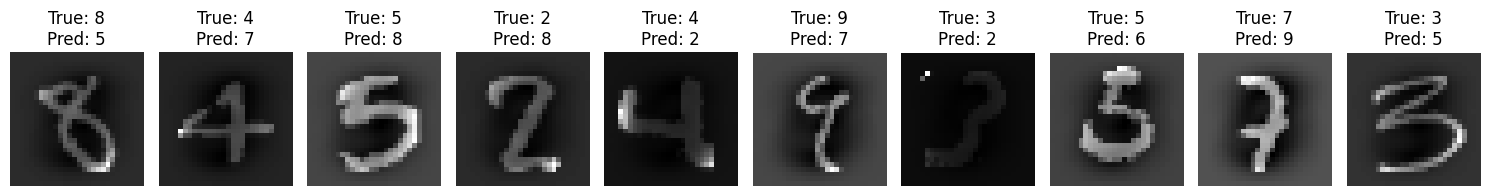

Number of misclassified examples (Neural Network): 403


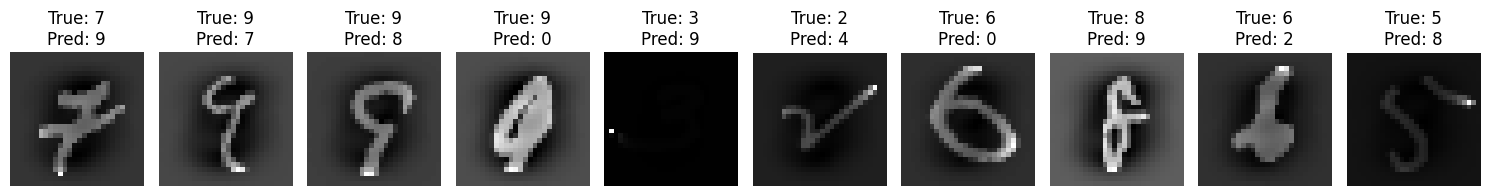

In [15]:
# Provide your code for part 4-3 here

# Logistic Regression misclassified examples
logistic_preds = logistic_model.predict(X_test)
logistic_misclassified = np.where(logistic_preds != y_test)[0]

print(f"Number of misclassified examples (Logistic Regression): {len(logistic_misclassified)}")
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    if i < len(logistic_misclassified):
        idx = logistic_misclassified[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f"True: {y_test[idx]}\nPred: {logistic_preds[idx]}")
plt.tight_layout()
plt.show()

# Neural Network misclassified examples
nn_preds = nn_model.predict(X_test)
nn_misclassified = np.where(nn_preds != y_test)[0]

print(f"Number of misclassified examples (Neural Network): {len(nn_misclassified)}")
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    if i < len(nn_misclassified):
        idx = nn_misclassified[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f"True: {y_test[idx]}\nPred: {nn_preds[idx]}")
plt.tight_layout()
plt.show()